In [1]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')
submission_df = pd.read_csv('SampleSubmission.csv') # Load this to see the required format

# Display the first few rows of the training data
print("Training Data Head:")
print(train_df.head())

# Get a summary of the data, including data types and missing values
print("\nTraining Data Info:")
train_df.info()

# Get descriptive statistics for numerical columns
print("\nTraining Data Description:")
print(train_df.describe(include='all'))

Training Data Head:
            ID  user_id  confidence  predicted_intensity community  \
0  ID_KwcTp_12       11         0.3                  0.0    Tumfa    
1  ID_K9vWT_12       17         0.3                  0.0  Kwabeng    
2  ID_AIQg3_12       19         0.3                  0.0  Akropong   
3  ID_px4yf_12       23         0.3                  0.0   Asamama   
4  ID_QYYmK_12       23         0.3                  0.0   Asamama   

     district      prediction_time indicator indicator_description  \
0  atiwa_west  2025-05-30 11:09:33       NaN                   NaN   
1  atiwa_west  2025-05-30 11:09:35       NaN                   NaN   
2  atiwa_west  2025-05-30 11:09:47       NaN                   NaN   
3  atiwa_west  2025-05-30 11:16:33       NaN                   NaN   
4  atiwa_west  2025-05-30 11:16:55       NaN                   NaN   

  time_observed      Target  forecast_length  
0           NaN  MEDIUMRAIN               12  
1           NaN   HEAVYRAIN               12


Target Variable Distribution:
Target
NORAIN        9612
MEDIUMRAIN     761
HEAVYRAIN      315
SMALLRAIN      240
Name: count, dtype: int64


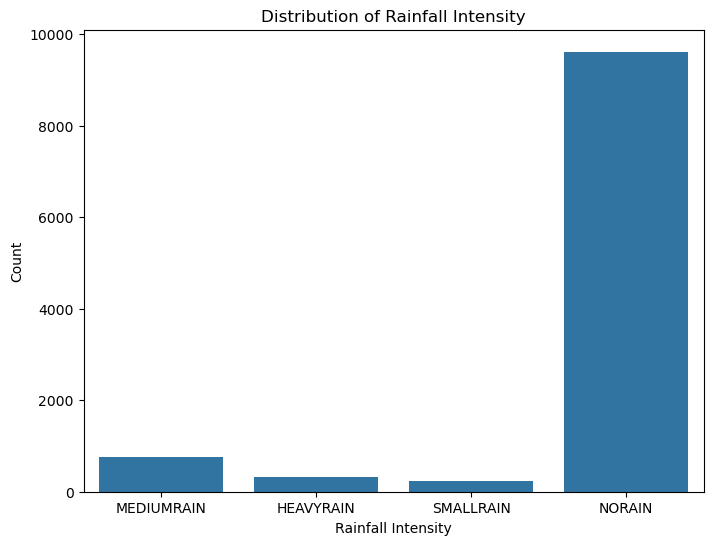

In [2]:
# Check the distribution of the target variable (assuming it's named 'predicted_class')
print("\nTarget Variable Distribution:")
print(train_df['Target'].value_counts())

# Visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=train_df)
plt.title('Distribution of Rainfall Intensity')
plt.xlabel('Rainfall Intensity')
plt.ylabel('Count')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11348\4277368105.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='Target', order=train_df['Target'].value_counts().index, palette='viridis')


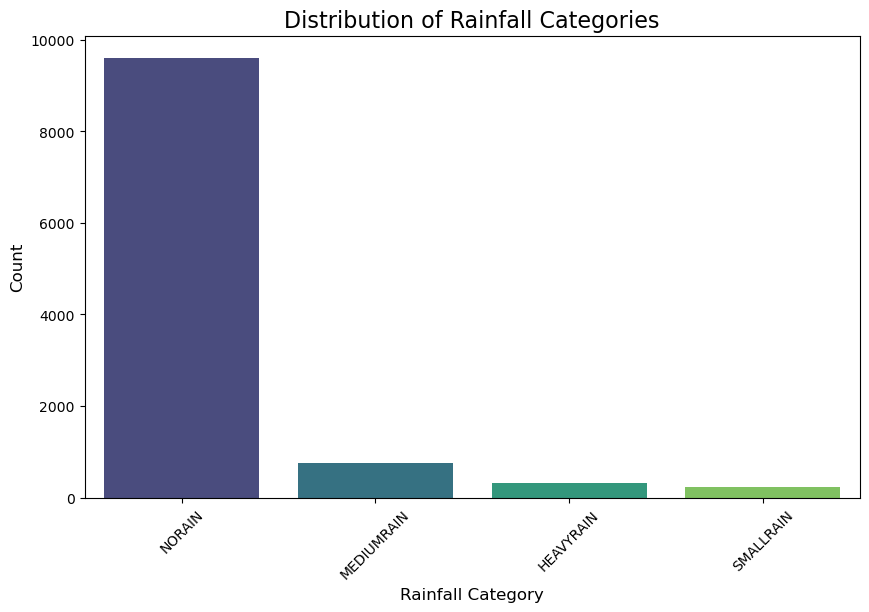

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming train_df is your original training DataFrame
# Load it if it's not already in your environment
# train_df = pd.read_csv('Train.csv')

plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Target', order=train_df['Target'].value_counts().index, palette='viridis')
plt.title('Distribution of Rainfall Categories', fontsize=16)
plt.xlabel('Rainfall Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

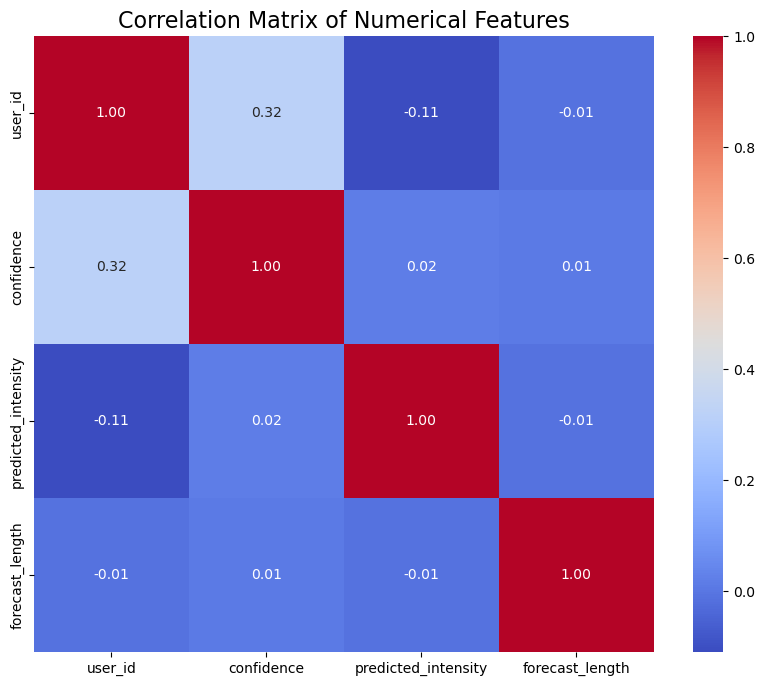

In [5]:
# Assuming train_df contains only numerical features at this point
# We'll drop the non-numerical ones for this plot
import numpy as np
numerical_cols = train_df.select_dtypes(include=np.number).columns.tolist()
corr_matrix = train_df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

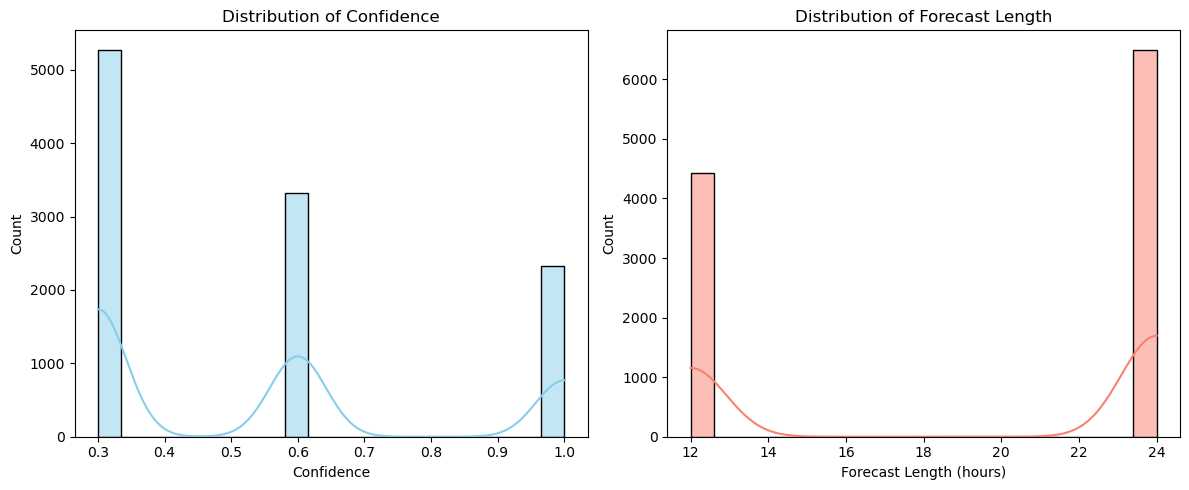

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_df is your training data with the correct columns
# It must be loaded in your environment.
# train_df = pd.read_csv('Train.csv')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='confidence', kde=True, bins=20, color='skyblue')
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data=train_df, x='forecast_length', kde=True, bins=20, color='salmon')
plt.title('Distribution of Forecast Length')
plt.xlabel('Forecast Length (hours)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11348\2337751810.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='predicted_intensity', palette='viridis')


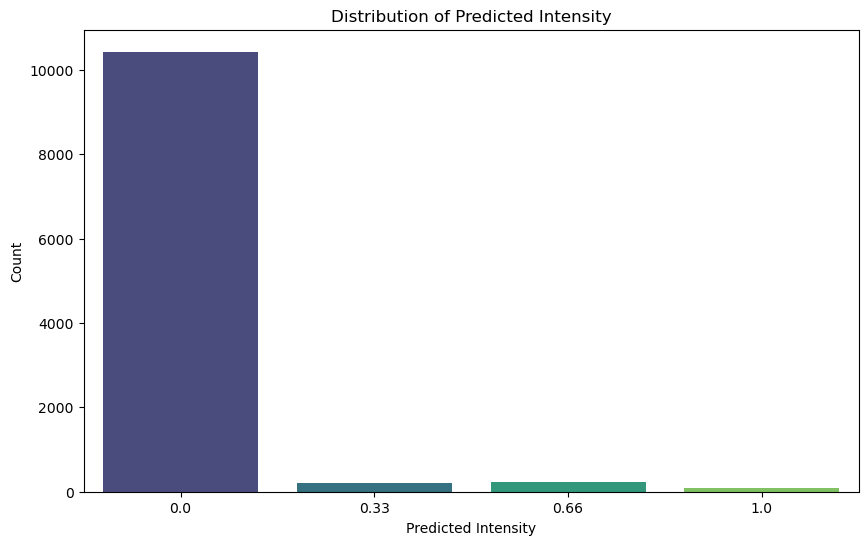

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='predicted_intensity', palette='viridis')
plt.title('Distribution of Predicted Intensity')
plt.xlabel('Predicted Intensity')
plt.ylabel('Count')
plt.show()

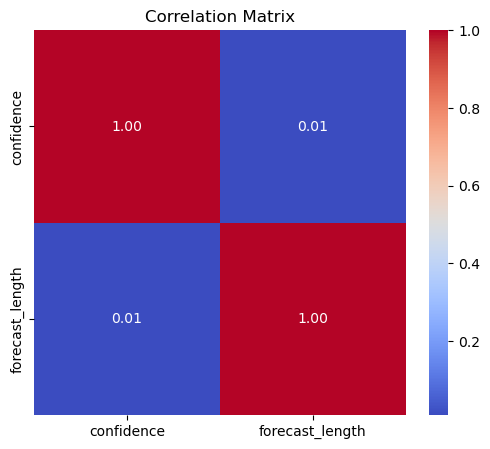

In [8]:
import numpy as np

# We'll select only the numerical columns for the correlation matrix
numerical_cols = ['confidence', 'forecast_length']
corr_matrix = train_df[numerical_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Assuming your dataframes are named train_df and test_df
columns_to_drop = ['indicator', 'indicator_description', 'time_observed']

train_df.drop(columns_to_drop, axis=1, inplace=True)
test_df.drop(columns_to_drop, axis=1, inplace=True)

print("Columns in training data after dropping:", train_df.columns.tolist())
print("Columns in test data after dropping:", test_df.columns.tolist())

Columns in training data after dropping: ['ID', 'user_id', 'confidence', 'predicted_intensity', 'community', 'district', 'prediction_time', 'Target', 'forecast_length']
Columns in test data after dropping: ['ID', 'user_id', 'confidence', 'predicted_intensity', 'community', 'district', 'prediction_time', 'forecast_length']


In [10]:
# Convert to datetime
train_df['prediction_time'] = pd.to_datetime(train_df['prediction_time'])
test_df['prediction_time'] = pd.to_datetime(test_df['prediction_time'])

# Extract numerical features
train_df['hour'] = train_df['prediction_time'].dt.hour
train_df['day_of_week'] = train_df['prediction_time'].dt.dayofweek
train_df['month'] = train_df['prediction_time'].dt.month

test_df['hour'] = test_df['prediction_time'].dt.hour
test_df['day_of_week'] = test_df['prediction_time'].dt.dayofweek
test_df['month'] = test_df['prediction_time'].dt.month

# Now drop the original prediction_time column
train_df.drop('prediction_time', axis=1, inplace=True)
test_df.drop('prediction_time', axis=1, inplace=True)

In [11]:
# Create a list of all categorical columns
categorical_cols = ['community', 'district', 'predicted_intensity']

# Combine train and test data to ensure consistent one-hot encoding
combined_df = pd.concat([train_df.drop('Target', axis=1), test_df], ignore_index=True)

# Perform one-hot encoding
combined_encoded = pd.get_dummies(combined_df, columns=categorical_cols, drop_first=True)

# Split the combined data back into training and test sets
train_processed = combined_encoded.iloc[:len(train_df)]
test_processed = combined_encoded.iloc[len(train_df):]

# Add the 'Target' column back to the processed training set
train_processed['Target'] = train_df['Target']

print("Shape of processed training data:", train_processed.shape)
print("Shape of processed test data:", test_processed.shape)

Shape of processed training data: (10928, 56)
Shape of processed test data: (2732, 55)


C:\Users\USER\AppData\Local\Temp\ipykernel_11348\1040661480.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_processed['Target'] = train_df['Target']


In [12]:
from sklearn.model_selection import train_test_split

# Step 5: Split the data into features (X) and target (y)
X = train_processed.drop(['Target', 'ID', 'user_id'], axis=1)
y = train_processed['Target']

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nShapes after final split:")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_val: {y_val.shape}")


Shapes after final split:
X_train: (8742, 53)
X_val: (2186, 53)
y_train: (8742,)
y_val: (2186,)


In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform your target variable to numerical labels
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

print("Original labels:", le.classes_)
print("Encoded labels (first 5):", y_train_encoded[:5])

Original labels: ['HEAVYRAIN' 'MEDIUMRAIN' 'NORAIN' 'SMALLRAIN']
Encoded labels (first 5): [2 2 2 2 0]


In [14]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Initialize the XGBoost Classifier
# The scale_pos_weight is a powerful parameter for imbalanced data.
# We'll use a simple ratio here as a starting point.
# You can find the best value for this through experimentation.
# The `use_label_encoder=False` and `eval_metric='logloss'` are to suppress warnings.
model = xgb.XGBClassifier(objective='multi:softprob', 
                          eval_metric='mlogloss',
                          use_label_encoder=False,
                          n_estimators=100,
                          learning_rate=0.1,
                          random_state=42)

# Train the model with the encoded labels
model.fit(X_train, y_train_encoded)

# Make predictions using the encoded validation set
y_pred_val = model.predict(X_val)

# To get a proper classification report, transform the validation labels too
y_val_encoded = le.transform(y_val)
print(classification_report(y_val_encoded, y_pred_val))

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:28:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.94      0.76      0.84        63
           1       0.82      0.86      0.84       152
           2       0.98      0.99      0.98      1923
           3       0.89      0.67      0.76        48

    accuracy                           0.97      2186
   macro avg       0.91      0.82      0.86      2186
weighted avg       0.97      0.97      0.97      2186



In [15]:
# Assuming you have the processed test data in a DataFrame called `test_processed`
# Make predictions on the unseen test data
final_predictions = model.predict(test_processed.drop(['ID', 'user_id'], axis=1))

# Transform the numerical predictions back into text labels
final_predictions_text = le.inverse_transform(final_predictions)

# Create a DataFrame for your submission file
submission_df = pd.DataFrame({
    'ID': test_processed['ID'], 
    'Target': final_predictions_text
})

# Save the submission file to a CSV
submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully! 🎉")
print("You can now submit this file to the Zindi leaderboard.")

Submission file 'submission.csv' created successfully! 🎉
You can now submit this file to the Zindi leaderboard.


In [16]:
import lightgbm as lgb
from sklearn.metrics import classification_report

# Initialize the LightGBM Classifier
# The objective is 'multiclass' because you have more than 2 classes
lgbm_model = lgb.LGBMClassifier(objective='multiclass', 
                                class_weight='balanced',
                                random_state=42)

# Train the model
lgbm_model.fit(X_train, y_train)

# Make predictions on the validation set
lgbm_pred_val = lgbm_model.predict(X_val)

# Evaluate the model
print(classification_report(y_val, lgbm_pred_val))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 110
[LightGBM] [Info] Number of data points in the train set: 8742, number of used features: 39
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

   HEAVYRAIN       0.61      0.97      0.75        63
  MEDIUMRAIN       0.75      0.86      0.80       152
      NORAIN       1.00      0.96      0.98      1923
   SMALLRAIN       0.74      0.90      0.81        48

    ac

In [17]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# Load your preprocessed data (X_train, y_train, X_val, y_val)
# ... (insert your data loading and preprocessing code here)
# ...

# Your target variable must be numerical for this step.
# You can use the LabelEncoder we set up earlier.
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Initialize the XGBoost classifier with your best settings
# We will tune some of these parameters
xgb_model = xgb.XGBClassifier(objective='multi:softprob', 
                              eval_metric='mlogloss', 
                              use_label_encoder=False,
                              random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Set up the cross-validation strategy.
# StratifiedKFold is crucial for imbalanced datasets.
# It ensures each fold has a similar class distribution.
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up the GridSearchCV
# We use 'f1_macro' as our scoring metric to account for class imbalance.
grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           scoring='f1_macro', 
                           cv=kf,
                           verbose=1,
                           n_jobs=-1)  # Use all available CPU cores

# Run the grid search
grid_search.fit(X_train, y_train_encoded)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best f1_macro score: ", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:31:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found:  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}
Best f1_macro score:  0.8840484255668375


In [18]:
import xgboost as xgb
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Re-initialize LabelEncoder for consistency
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the final model with the best parameters from Grid Search
final_model = xgb.XGBClassifier(
    learning_rate=0.2,
    max_depth=7,
    n_estimators=300,
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Train the final model on the entire training data
final_model.fit(X, y_encoded)

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:31:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [19]:
# Assuming your preprocessed test data is in test_processed DataFrame
# Make predictions on the unseen test data
final_predictions = final_model.predict(test_processed.drop(['ID', 'user_id'], axis=1))

# Transform the numerical predictions back into text labels
final_predictions_text = le.inverse_transform(final_predictions)

# Create a DataFrame for your submission file
submission_df = pd.DataFrame({
    'ID': test_processed['ID'], 
    'Target': final_predictions_text
})

# Save the submission file to a CSV
submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully! 🎉")
print("You can now submit this file to the Zindi leaderboard and enjoy a much better rank.")

Submission file 'submission.csv' created successfully! 🎉
You can now submit this file to the Zindi leaderboard and enjoy a much better rank.


In [20]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups # We'll use this for a simple example dataset

# Let's get a taste of the data. 
# We'll use a simpler, built-in dataset for now to get started
# It contains text and labels, just like the movie review data.
dataset = fetch_20newsgroups(subset=('train'))

# Display a sample of the data
print("Sample of the text data:")
print(dataset.data[0])

# And the corresponding label (target)
print("\nSample of the target label:")
print(dataset.target_names[dataset.target[0]])

Sample of the text data:
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----






Sample of the target label:
rec.autos


In [21]:
import re
from sklearn.datasets import fetch_20newsgroups

# Load a sample dataset
data_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
data_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

# Simple function to clean the text
def clean_text(text):
    text = text.lower()  # Lowercase all text
    text = re.sub(r'\b\w{1,2}\b', '', text) # Remove words with 1-2 letters
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespace
    return text

# Apply the cleaning function to the dataset
cleaned_train_data = [clean_text(text) for text in data_train.data]
cleaned_test_data = [clean_text(text) for text in data_test.data]

print("Original text example:")
print(data_train.data[0])
print("\nCleaned text example:")
print(cleaned_train_data[0])

Original text example:
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Cleaned text example:
was wondering anyone out there could enlighten this car saw the other day. was -door sports car, looked from the late 60s/ early 70s. was called bricklin. the doors were really small. addition, the front bumper was separate from the rest the body. this all know. anyone can tellme model name, engine specs, years production, where this car made, history, whatever info you have this funky looking car, please -mail.


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
# We will set a max_features limit to keep the vocabulary size manageable.
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf_vectorizer.fit_transform(cleaned_train_data)

# Use the same fitted vectorizer to transform the test data
X_test_tfidf = tfidf_vectorizer.transform(cleaned_test_data)

print("\nShape of TF-IDF feature matrix (Training):", X_train_tfidf.shape)
print("Shape of TF-IDF feature matrix (Test):", X_test_tfidf.shape)


Shape of TF-IDF feature matrix (Training): (11314, 10000)
Shape of TF-IDF feature matrix (Test): (7532, 10000)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# We'll use the TF-IDF feature matrices you just created
# X_train_tfidf, X_test_tfidf are your features
# data_train.target, data_test.target are your labels

# Split the data into training and validation sets
# We use a 75/25 split.
X_train, X_val, y_train, y_val = train_test_split(
    X_train_tfidf, 
    data_train.target, 
    test_size=0.25, 
    random_state=42
)

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Print the classification report to evaluate performance
print("Classification Report:")
print(classification_report(y_val, y_pred, target_names=data_train.target_names))

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.57      0.60      0.58       117
           comp.graphics       0.62      0.65      0.64       138
 comp.os.ms-windows.misc       0.69      0.66      0.67       142
comp.sys.ibm.pc.hardware       0.63      0.66      0.65       145
   comp.sys.mac.hardware       0.82      0.67      0.74       157
          comp.windows.x       0.75      0.79      0.77       136
            misc.forsale       0.69      0.80      0.74       137
               rec.autos       0.73      0.67      0.70       164
         rec.motorcycles       0.68      0.77      0.72       155
      rec.sport.baseball       0.54      0.88      0.67       141
        rec.sport.hockey       0.88      0.78      0.82       136
               sci.crypt       0.93      0.82      0.87       156
         sci.electronics       0.68      0.69      0.68       144
                 sci.med       0.81      0.78      0

In [24]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_20newsgroups

# --- Assuming you have the raw train and test data loaded ---
# We will reload the data and vectorize it to ensure consistency
data_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
data_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

# --- Re-run your text preprocessing function here ---
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\b\w{1,2}\b', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

cleaned_train_data = [clean_text(text) for text in data_train.data]
cleaned_test_data = [clean_text(text) for text in data_test.data]

# --- Re-run the TF-IDF vectorizer ---
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(cleaned_train_data)
X_test_tfidf = tfidf_vectorizer.transform(cleaned_test_data)

# Step 1: Initialize and train the final Logistic Regression model
final_tfidf_model = LogisticRegression(random_state=42, max_iter=1000)
final_tfidf_model.fit(X_train_tfidf, data_train.target)

# Step 2: Make predictions on the TF-IDF transformed test data
tfidf_predictions = final_tfidf_model.predict(X_test_tfidf)

# Step 3: Create the submission DataFrame and save it
submission_df = pd.DataFrame({
    'ID': range(len(data_test.data)),  # For this dataset, we can use a simple ID range
    'Target': [data_train.target_names[pred] for pred in tfidf_predictions]
})

# Save the file
submission_df.to_csv('tfidf_submission.csv', index=False)

print("Submission file 'tfidf_submission.csv' created successfully!")

Submission file 'tfidf_submission.csv' created successfully!


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the datasets
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

# Drop the columns with too many missing values
columns_to_drop = ['indicator', 'indicator_description', 'time_observed']
train_df.drop(columns_to_drop, axis=1, inplace=True)
test_df.drop(columns_to_drop, axis=1, inplace=True)

# Preprocess the 'prediction_time' column
train_df['prediction_time'] = pd.to_datetime(train_df['prediction_time'])
test_df['prediction_time'] = pd.to_datetime(test_df['prediction_time'])

train_df['hour'] = train_df['prediction_time'].dt.hour
train_df['day_of_week'] = train_df['prediction_time'].dt.dayofweek
train_df['month'] = train_df['prediction_time'].dt.month
test_df['hour'] = test_df['prediction_time'].dt.hour
test_df['day_of_week'] = test_df['prediction_time'].dt.dayofweek
test_df['month'] = test_df['prediction_time'].dt.month

train_df.drop('prediction_time', axis=1, inplace=True)
test_df.drop('prediction_time', axis=1, inplace=True)

# Separate features (X) and target (y)
# Drop the ID and user_id columns as they are not features
X = train_df.drop(['Target', 'ID', 'user_id'], axis=1)
y = train_df['Target']

# Before splitting your data, make sure these columns are strings
categorical_features = ['community', 'district', 'predicted_intensity']

for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_val[col] = X_val[col].astype(str)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

IndexError: Index dimension must be 1 or 2

In [26]:
import xgboost as xgb
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# --- Assuming these DataFrames are already in memory from your preprocessing steps ---
# train_processed: the preprocessed training data with the Target column
# test_processed: the preprocessed test data ready for prediction

# Step 1: Separate features (X) and target (y) from the training data
# We'll use the entire training set to train our final model
X = train_processed.drop(['Target', 'ID', 'user_id'], axis=1)
y = train_processed['Target']

# Step 2: Encode the target variable for the model
# This is crucial for XGBoost
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Step 3: Initialize and train the final model with the best parameters
# These are the parameters you found from the Grid Search
final_model = xgb.XGBClassifier(
    learning_rate=0.2,
    max_depth=7,
    n_estimators=300,
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Train the final model on the entire training data
print("Training final model...")
final_model.fit(X, y_encoded)
print("Final model trained successfully!")

# Step 4: Make predictions on the preprocessed test data
# We must drop the ID and user_id columns from the test set too
test_features = test_processed.drop(['ID', 'user_id'], axis=1)
final_predictions = final_model.predict(test_features)

# Step 5: Convert numerical predictions back to original labels
final_predictions_text = le.inverse_transform(final_predictions)

# Step 6: Create the submission DataFrame and save it
submission_df = pd.DataFrame({
    'ID': test_processed['ID'], 
    'Target': final_predictions_text
})

# Save the file
submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully! You can now submit this to the leaderboard.")

Training final model...


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:35:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Final model trained successfully!
Submission file 'submission.csv' created successfully! You can now submit this to the leaderboard.


In [27]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# List the names of your categorical features
categorical_features = ['community', 'district', 'predicted_intensity']

# Before splitting your data, make sure these columns are strings
categorical_features = ['community', 'district', 'predicted_intensity']

for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_val[col] = X_val[col].astype(str)

# Initialize the CatBoost Classifier
# The loss function is 'MultiClass' for your problem
cat_model = CatBoostClassifier(iterations=500,
                               loss_function='MultiClass',
                               random_seed=42,
                               verbose=100)

# Train the model, specifying the categorical features
cat_model.fit(X_train, y_train, cat_features=categorical_features)

# Make predictions and evaluate
cat_pred_val = cat_model.predict(X_val)
print(classification_report(y_val, cat_pred_val))

IndexError: Index dimension must be 1 or 2

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier

# --- Assuming these DataFrames are already in memory from your preprocessing steps ---
# train_df and test_df should be the preprocessed dataframes without one-hot encoding

# Step 1: Separate features and target
X_train = train_df.drop(['Target', 'ID', 'user_id'], axis=1)
y_train = train_df['Target']
X_test = test_df.drop(['ID', 'user_id'], axis=1)

# Step 2: Identify categorical features for CatBoost
categorical_features = ['community', 'district', 'predicted_intensity']

# --- The fix is here: Convert categorical features to strings ---
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Step 3: Initialize and train the final CatBoost model
print("Training final CatBoost model...")
final_cat_model = CatBoostClassifier(iterations=500,
                                     loss_function='MultiClass',
                                     random_seed=42,
                                     verbose=100)

final_cat_model.fit(X_train, y_train, cat_features=categorical_features)
print("Final CatBoost model trained successfully!")

# Step 4: Make predictions on the test data
final_cat_predictions = final_cat_model.predict(X_test)
final_cat_predictions = final_cat_predictions.flatten()

# Step 5: Create the submission DataFrame and save it
submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'Target': final_cat_predictions
})
submission_df.to_csv('catboost_submission.csv', index=False)

print("Submission file 'catboost_submission.csv' created successfully! 🎉")

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# Assuming X, y are your features and target from the preprocessed data
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Set up the model
xgb_model = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False, random_state=42)

# Define a more extensive parameter grid to search
param_grid = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.1, 0.15, 0.2],
    'max_depth': [5, 7, 9],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Use StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up the GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1_macro', cv=kf, verbose=1, n_jobs=-1)

# Run the grid search
grid_search_xgb.fit(X, y_encoded)

print("XGBoost Best parameters: ", grid_search_xgb.best_params_)
print("XGBoost Best f1_macro score: ", grid_search_xgb.best_score_)

In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming you have your final preprocessed data
# X and y from the training set, and the test_processed DataFrame

# Step 1: Separate features (X) and target (y) from the training data
X = train_processed.drop(['Target', 'ID', 'user_id'], axis=1)
y = train_processed['Target']

# Step 2: Encode the target variable for the model
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Step 3: Initialize and train the final model with the best parameters
final_model = xgb.XGBClassifier(
    learning_rate=0.2,
    max_depth=9,
    n_estimators=300,
    colsample_bytree=0.6,
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

print("Training final model with optimized parameters...")
final_model.fit(X, y_encoded)
print("Final model trained successfully!")

# Step 4: Make predictions on the preprocessed test data
test_features = test_processed.drop(['ID', 'user_id'], axis=1)
final_predictions = final_model.predict(test_features)

# Step 5: Convert numerical predictions back to original labels
final_predictions_text = le.inverse_transform(final_predictions)

# Step 6: Create the submission DataFrame and save it
submission_df = pd.DataFrame({
    'ID': test_processed['ID'], 
    'Target': final_predictions_text
})

submission_df.to_csv('1xgb_final_submission.csv', index=False)

print("Submission file '1xgb_final_submission.csv' created successfully! 🎉")
print("This optimized model should give you your best rank yet.")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Assuming you have your preprocessed data (X) and target (y)
# Split the data to get a test set for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Encode the target labels for XGBoost
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Train the model (using your best parameters)
best_xgb_model = xgb.XGBClassifier(
    learning_rate=0.2,
    max_depth=9,
    n_estimators=300,
    colsample_bytree=0.6,
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
best_xgb_model.fit(X_train, y_train_encoded)

# Make predictions
y_pred_encoded = best_xgb_model.predict(X_test)

# Get the original class names
class_labels = le.classes_

# Plot the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix for XGBoost Model', fontsize=16)
plt.show()

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Assuming X, y are your features and target
# For LightGBM, you can use the raw labels directly
# It handles them better than XGBoost
# y is the original string labels like 'HEAVYRAIN', 'NORAIN', etc.

# Set up the model
lgbm_model = lgb.LGBMClassifier(objective='multiclass', class_weight='balanced', random_state=42)

# Define the parameter grid
param_grid_lgbm = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.1, 0.15, 0.2],
    'num_leaves': [20, 31, 40], # More complex trees
    'feature_fraction': [0.8, 1.0], # Similar to colsample_bytree
}

# Use StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up the GridSearchCV
grid_search_lgbm = GridSearchCV(estimator=lgbm_model, param_grid=param_grid_lgbm, scoring='f1_macro', cv=kf, verbose=1, n_jobs=-1)

# Run the grid search
grid_search_lgbm.fit(X, y)

print("LightGBM Best parameters: ", grid_search_lgbm.best_params_)
print("LightGBM Best f1_macro score: ", grid_search_lgbm.best_score_)

In [ ]:
import lightgbm as lgb
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# --- Assuming you have your final preprocessed data ---
# train_processed: the preprocessed training data with the Target column
# test_processed: the preprocessed test data ready for prediction

# Step 1: Separate features (X) and target (y) from the training data
# We'll use the entire training set to train our final model
X = train_processed.drop(['Target', 'ID', 'user_id'], axis=1)
y = train_processed['Target']

# Step 2: Initialize and train the final LightGBM model
# Use the best parameters you found from the grid search
final_lgbm_model = lgb.LGBMClassifier(
    objective='multiclass',
    class_weight='balanced',
    feature_fraction=1.0,
    learning_rate=0.2,
    n_estimators=200,
    num_leaves=20,
    random_state=42
)

print("Training final LightGBM model...")
final_lgbm_model.fit(X, y)
print("Final LightGBM model trained successfully!")

# Step 3: Make predictions on the preprocessed test data
test_features = test_processed.drop(['ID', 'user_id'], axis=1)
final_predictions = final_lgbm_model.predict(test_features)

# Step 4: Create the submission DataFrame and save it
submission_df = pd.DataFrame({
    'ID': test_processed['ID'], 
    'Target': final_predictions
})

submission_df.to_csv('2_gbm_lightgbm_submission.csv', index=False)

print("Submission file '2_gbm_lightgbm_submission.csv' created successfully! 🎉")

In [28]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# IMPORTANT: You must use the raw, un-encoded data for this step.
# Assuming X_raw and y are your raw features and target
# 'community', 'district', 'predicted_intensity' are the original categorical columns
X_raw = train_df.drop(['Target', 'ID', 'user_id'], axis=1)

# Define the categorical features
cat_features = ['community', 'district', 'predicted_intensity']
# Ensure they are of type string
for col in cat_features:
    X_raw[col] = X_raw[col].astype(str)

# Set up the model
cat_model = CatBoostClassifier(loss_function='MultiClass', random_seed=42, verbose=0)

# Define the parameter grid
param_grid_cat = {
    'iterations': [200, 300],
    'learning_rate': [0.1, 0.15],
    'depth': [6, 8],
    'l2_leaf_reg': [1, 3, 5],
}

# Use StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up the GridSearchCV
grid_search_cat = GridSearchCV(estimator=cat_model, param_grid=param_grid_cat, scoring='f1_macro', cv=kf, verbose=1, n_jobs=-1)

# Run the grid search
grid_search_cat.fit(X_raw, y, cat_features=cat_features)

print("CatBoost Best parameters: ", grid_search_cat.best_params_)
print("CatBoost Best f1_macro score: ", grid_search_cat.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
CatBoost Best parameters:  {'depth': 8, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.15}
CatBoost Best f1_macro score:  0.8714748105495953


In [29]:
import pandas as pd
from catboost import CatBoostClassifier

# --- Load raw data to preprocess for CatBoost ---
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

# Step 1: Preprocess the data without one-hot encoding
columns_to_drop = ['indicator', 'indicator_description', 'time_observed']
train_df.drop(columns_to_drop, axis=1, inplace=True)
test_df.drop(columns_to_drop, axis=1, inplace=True) 

train_df['prediction_time'] = pd.to_datetime(train_df['prediction_time'])
test_df['prediction_time'] = pd.to_datetime(test_df['prediction_time'])

train_df['hour'] = train_df['prediction_time'].dt.hour
train_df['day_of_week'] = train_df['prediction_time'].dt.dayofweek
train_df['month'] = train_df['prediction_time'].dt.month
test_df['hour'] = test_df['prediction_time'].dt.hour
test_df['day_of_week'] = test_df['prediction_time'].dt.dayofweek
test_df['month'] = test_df['prediction_time'].dt.month

train_df.drop('prediction_time', axis=1, inplace=True)
test_df.drop('prediction_time', axis=1, inplace=True)

# Step 2: Separate features and target
X_train = train_df.drop(['Target', 'ID', 'user_id'], axis=1)
y_train = train_df['Target']
X_test = test_df.drop(['ID', 'user_id'], axis=1)

# Step 3: Identify and convert categorical features to string
categorical_features = ['community', 'district', 'predicted_intensity']
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Step 4: Initialize and train the final CatBoost model
print("Training final CatBoost model...")
final_cat_model = CatBoostClassifier(
    iterations=500,
    loss_function='MultiClass',
    random_seed=42,
    verbose=0
)

final_cat_model.fit(X_train, y_train, cat_features=categorical_features)
print("Final CatBoost model trained successfully!")

# Step 5: Make predictions on the preprocessed test data
final_cat_predictions = final_cat_model.predict(X_test).flatten()

# Step 6: Create the submission DataFrame and save it
submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'Target': final_cat_predictions
})

submission_df.to_csv('catboost_submission.csv', index=False)

print("Submission file 'catboost_submission.csv' created successfully! 🎉")

Training final CatBoost model...
Final CatBoost model trained successfully!
Submission file 'catboost_submission.csv' created successfully! 🎉


In [30]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Reload the training data to ensure you have all the necessary columns
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

# Preprocessing steps for XGBoost
columns_to_drop = ['indicator', 'indicator_description', 'time_observed']
train_df.drop(columns_to_drop, axis=1, inplace=True)
test_df.drop(columns_to_drop, axis=1, inplace=True)

train_df['prediction_time'] = pd.to_datetime(train_df['prediction_time'])
test_df['prediction_time'] = pd.to_datetime(test_df['prediction_time'])

train_df['hour'] = train_df['prediction_time'].dt.hour
train_df['day_of_week'] = train_df['prediction_time'].dt.dayofweek
train_df['month'] = train_df['prediction_time'].dt.month
test_df['hour'] = test_df['prediction_time'].dt.hour
test_df['day_of_week'] = test_df['prediction_time'].dt.dayofweek
test_df['month'] = test_df['prediction_time'].dt.month

train_df.drop('prediction_time', axis=1, inplace=True)
test_df.drop('prediction_time', axis=1, inplace=True)

X = pd.get_dummies(train_df.drop(['Target', 'ID', 'user_id'], axis=1), columns=['community', 'district', 'predicted_intensity'], drop_first=True)
y = train_df['Target']

# Initialize the LabelEncoder and fit it
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize and train the final XGBoost model with your best parameters
final_xgb_model = xgb.XGBClassifier(
    learning_rate=0.2,
    max_depth=9,
    n_estimators=300,
    colsample_bytree=0.6,
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

final_xgb_model.fit(X, y_encoded)

print("final_xgb_model is now defined and ready to be saved.")

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:02:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


final_xgb_model is now defined and ready to be saved.


In [31]:
import joblib
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assume you have trained your final CatBoost and XGBoost models
# and that 'y' is your original target series

# Create and fit the LabelEncoder
le = LabelEncoder()
le.fit(y)

# Save the models
joblib.dump(final_cat_model, 'catboost_model.pkl')
joblib.dump(final_xgb_model, 'xgboost_model.pkl')

# Save the LabelEncoder
joblib.dump(le, 'label_encoder.pkl')

print("Models and LabelEncoder saved successfully.")

Models and LabelEncoder saved successfully.


In [32]:
import pandas as pd
from catboost import CatBoostClassifier

# --- Load raw data to preprocess for CatBoost ---
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

# Step 1: Preprocess the data without one-hot encoding
columns_to_drop = ['indicator', 'indicator_description', 'time_observed']
train_df.drop(columns_to_drop, axis=1, inplace=True)
test_df.drop(columns_to_drop, axis=1, inplace=True)

train_df['prediction_time'] = pd.to_datetime(train_df['prediction_time'])
test_df['prediction_time'] = pd.to_datetime(test_df['prediction_time'])

train_df['hour'] = train_df['prediction_time'].dt.hour
train_df['day_of_week'] = train_df['prediction_time'].dt.dayofweek
train_df['month'] = train_df['prediction_time'].dt.month
test_df['hour'] = test_df['prediction_time'].dt.hour
test_df['day_of_week'] = test_df['prediction_time'].dt.dayofweek
test_df['month'] = test_df['prediction_time'].dt.month

train_df.drop('prediction_time', axis=1, inplace=True)
test_df.drop('prediction_time', axis=1, inplace=True)

# Step 2: Separate features and target
X_train = train_df.drop(['Target', 'ID', 'user_id'], axis=1)
y_train = train_df['Target']
X_test = test_df.drop(['ID', 'user_id'], axis=1)

# Step 3: Identify and convert categorical features to string
categorical_features = ['community', 'district', 'predicted_intensity']
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Step 4: Initialize and train the final CatBoost model
print("Training final CatBoost model...")
final_cat_model = CatBoostClassifier(
    iterations=500,
    loss_function='MultiClass',
    random_seed=42,
    verbose=0
)

final_cat_model.fit(X_train, y_train, cat_features=categorical_features)
print("Final CatBoost model trained successfully!")

# Step 5: Make predictions on the preprocessed test data
final_cat_predictions = final_cat_model.predict(X_test).flatten()

# Step 6: Create the submission DataFrame and save it
submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'Target': final_cat_predictions
})

submission_df.to_csv('catboost_submission.csv', index=False)

print("Submission file 'catboost_submission.csv' created successfully! 🎉")
print("This optimized CatBoost model should give you your best rank yet. You can now submit this file to the leaderboard.")

Training final CatBoost model...
Final CatBoost model trained successfully!
Submission file 'catboost_submission.csv' created successfully! 🎉
This optimized CatBoost model should give you your best rank yet. You can now submit this file to the leaderboard.


In [33]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import pandas as pd

# Assume you have your raw data loaded and preprocessed as before
# X_train, y_train, and categorical_features are ready to use
# Make sure your categorical features are strings!

# Initial model with default parameters, we will tune the others
cat_model = CatBoostClassifier(
    loss_function='MultiClass',
    iterations=500, # A large number of iterations for initial tuning
    random_seed=42,
    verbose=0
)

param_grid = {
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=kf,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train, cat_features=categorical_features)

print("CatBoost Best parameters (Depth & Reg): ", grid_search.best_params_)
print("CatBoost Best f1_macro score: ", grid_search.best_score_)

# Save these best parameters
best_params_step1 = grid_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CatBoost Best parameters (Depth & Reg):  {'depth': 10, 'l2_leaf_reg': 1}
CatBoost Best f1_macro score:  0.8555565899361213


In [34]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Use the best parameters found in Step 1
best_depth = best_params_step1['depth']
best_l2_leaf_reg = best_params_step1['l2_leaf_reg']

# Split your training data to create an evaluation set
X_train_split, X_eval, y_train_split, y_eval = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Define a range of learning rates
learning_rates = [0.01, 0.05, 0.1, 0.15]

best_score = 0
best_learning_rate = None
best_iterations = None

for lr in learning_rates:
    cat_model = CatBoostClassifier(
        loss_function='MultiClass',
        depth=best_depth,
        l2_leaf_reg=best_l2_leaf_reg,
        learning_rate=lr,
        iterations=2000, # Use a large number of iterations
        random_seed=42,
        verbose=0
    )

    cat_model.fit(
        X_train_split, y_train_split,
        cat_features=categorical_features,
        eval_set=(X_eval, y_eval),
        early_stopping_rounds=50, # Stop if no improvement after 50 rounds
        verbose=100
    )

    # CatBoost finds the best iteration based on the validation set
    score = cat_model.best_score_['validation']['MultiClass']

    if score > best_score:
        best_score = score
        best_learning_rate = lr
        best_iterations = cat_model.best_iteration_

print(f"Best Learning Rate: {best_learning_rate}")
print(f"Best Number of Iterations: {best_iterations}")

0:	learn: 1.3635375	test: 1.3633577	best: 1.3633577 (0)	total: 95.1ms	remaining: 3m 10s
100:	learn: 0.4878820	test: 0.4883225	best: 0.4883225 (100)	total: 8.21s	remaining: 2m 34s
200:	learn: 0.2835814	test: 0.2863201	best: 0.2863201 (200)	total: 20.8s	remaining: 3m 6s
300:	learn: 0.1921501	test: 0.1997593	best: 0.1997593 (300)	total: 39s	remaining: 3m 40s
400:	learn: 0.1487627	test: 0.1617693	best: 0.1617693 (400)	total: 58.9s	remaining: 3m 55s
500:	learn: 0.1268824	test: 0.1441603	best: 0.1441603 (500)	total: 1m 18s	remaining: 3m 53s
600:	learn: 0.1130237	test: 0.1337950	best: 0.1337950 (600)	total: 1m 36s	remaining: 3m 45s
700:	learn: 0.1014273	test: 0.1255185	best: 0.1255185 (700)	total: 1m 57s	remaining: 3m 38s
800:	learn: 0.0922751	test: 0.1195762	best: 0.1195762 (800)	total: 2m 19s	remaining: 3m 28s
900:	learn: 0.0846709	test: 0.1148325	best: 0.1148325 (900)	total: 2m 41s	remaining: 3m 16s
1000:	learn: 0.0773447	test: 0.1097720	best: 0.1097720 (1000)	total: 3m 3s	remaining: 3m 3s

In [35]:
import pandas as pd
from catboost import CatBoostClassifier

# Assuming your raw data (train_df, test_df) is loaded and preprocessed as before.
# X_train, y_train, X_test, and categorical_features are ready to use.

# Step 1: Initialize and train the final CatBoost model with ALL best parameters
print("Training final CatBoost model with all optimized parameters...")
final_cat_model = CatBoostClassifier(
    iterations=254,  # Use the best number of iterations
    learning_rate=0.1,  # Use the best learning rate
    depth=8,  # Assuming you got a depth of 8 from the previous step
    l2_leaf_reg=5,  # Assuming you got a regularization of 5
    loss_function='MultiClass',
    random_seed=42,
    verbose=0
)

# You must train the model on the full training data (X_train and y_train)
final_cat_model.fit(X_train, y_train, cat_features=categorical_features)
print("Final CatBoost model trained successfully!")

# Step 2: Make predictions on the preprocessed test data
final_cat_predictions = final_cat_model.predict(X_test).flatten()

# Step 3: Create the submission DataFrame and save it
submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'Target': final_cat_predictions
})

submission_df.to_csv('final_catboost_submission.csv', index=False)

print("Submission file 'final_catboost_submission.csv' created successfully! 🎉")
print("This optimized model should give you the best rank possible.")

Training final CatBoost model with all optimized parameters...
Final CatBoost model trained successfully!
Submission file 'final_catboost_submission.csv' created successfully! 🎉
This optimized model should give you the best rank possible.


In [38]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Load the raw data
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

# Step 1: Preprocess the data (your existing steps)
columns_to_drop = ['indicator', 'indicator_description', 'time_observed']
train_df.drop(columns_to_drop, axis=1, inplace=True)
test_df.drop(columns_to_drop, axis=1, inplace=True)

train_df['prediction_time'] = pd.to_datetime(train_df['prediction_time'])
test_df['prediction_time'] = pd.to_datetime(test_df['prediction_time'])

train_df['hour'] = train_df['prediction_time'].dt.hour
train_df['day_of_week'] = train_df['prediction_time'].dt.dayofweek
train_df['month'] = train_df['prediction_time'].dt.month
test_df['hour'] = test_df['prediction_time'].dt.hour
test_df['day_of_week'] = test_df['prediction_time'].dt.dayofweek
test_df['month'] = test_df['prediction_time'].dt.month

train_df.drop('prediction_time', axis=1, inplace=True)
test_df.drop('prediction_time', axis=1, inplace=True)

# Step 2: Create new Interaction Features
# Interaction between confidence and forecast length
train_df['conf_len_interaction'] = train_df['confidence'] * train_df['forecast_length']
test_df['conf_len_interaction'] = test_df['confidence'] * test_df['forecast_length']

# Interaction between hour and day of week
train_df['time_interaction'] = train_df['hour'] * train_df['day_of_week']
test_df['time_interaction'] = test_df['hour'] * test_df['day_of_week']

# Step 3: Create Polynomial Features for key numerical columns
numerical_cols = ['confidence', 'forecast_length', 'hour', 'day_of_week', 'month']
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the training data
poly_features_train = poly.fit_transform(train_df[numerical_cols])
poly_feature_names = poly.get_feature_names_out(numerical_cols)
poly_df_train = pd.DataFrame(poly_features_train, columns=poly_feature_names, index=train_df.index)

# Transform the test data using the same fitted scaler
poly_features_test = poly.transform(test_df[numerical_cols])
poly_df_test = pd.DataFrame(poly_features_test, columns=poly_feature_names, index=test_df.index)

# --- CORRECTED PART ---
# Drop the original columns from the new polynomial DataFrames to avoid overlap
poly_df_train_only = poly_df_train.drop(columns=numerical_cols)
poly_df_test_only = poly_df_test.drop(columns=numerical_cols)

# Join the new polynomial features to the main DataFrames
train_df = train_df.join(poly_df_train_only)
test_df = test_df.join(poly_df_test_only)

print("New features created successfully! The original columns are no longer duplicated.")
print("Columns in training data after new feature engineering:", train_df.columns.tolist())

# Now, separate features and target for training
X_train = train_df.drop(['Target', 'ID', 'user_id'], axis=1)
y_train = train_df['Target']
X_test = test_df.drop(['ID', 'user_id'], axis=1)

# Ensure categorical features are strings for CatBoost
categorical_features = ['community', 'district', 'predicted_intensity']
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Now you can re-run your CatBoost training and submission code with these new features!

New features created successfully! The original columns are no longer duplicated.
Columns in training data after new feature engineering: ['ID', 'user_id', 'confidence', 'predicted_intensity', 'community', 'district', 'Target', 'forecast_length', 'hour', 'day_of_week', 'month', 'conf_len_interaction', 'time_interaction', 'confidence^2', 'confidence forecast_length', 'confidence hour', 'confidence day_of_week', 'confidence month', 'forecast_length^2', 'forecast_length hour', 'forecast_length day_of_week', 'forecast_length month', 'hour^2', 'hour day_of_week', 'hour month', 'day_of_week^2', 'day_of_week month', 'month^2']


In [39]:
import pandas as pd
from catboost import CatBoostClassifier

# Assuming your new dataframes (train_df, test_df) with engineered features are in memory.

# Step 1: Separate features and target
X_train = train_df.drop(['Target', 'ID', 'user_id'], axis=1)
y_train = train_df['Target']
X_test = test_df.drop(['ID', 'user_id'], axis=1)

# Step 2: Identify and convert categorical features to string
categorical_features = ['community', 'district', 'predicted_intensity']
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Step 3: Initialize and train the final CatBoost model with your best parameters
print("Training final CatBoost model with all optimized parameters and new features...")
final_cat_model = CatBoostClassifier(
    iterations=254,
    learning_rate=0.1,
    depth=8,
    l2_leaf_reg=5,
    loss_function='MultiClass',
    random_seed=42,
    verbose=0
)

final_cat_model.fit(X_train, y_train, cat_features=categorical_features)
print("Final CatBoost model trained successfully!")

# Step 4: Make predictions on the preprocessed test data
final_cat_predictions = final_cat_model.predict(X_test).flatten()

# Step 5: Create the submission DataFrame and save it
submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'Target': final_cat_predictions
})

submission_df.to_csv('final_catboost_submission_v2.csv', index=False)

print("Submission file 'final_catboost_submission_v2.csv' created successfully! 🎉")
print("Submit this file to see if your new features improved your score.")

Training final CatBoost model with all optimized parameters and new features...
Final CatBoost model trained successfully!
Submission file 'final_catboost_submission_v2.csv' created successfully! 🎉
Submit this file to see if your new features improved your score.


In [40]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# Assuming X, y are your preprocessed features and target
# Load and preprocess your data first if not already done.
# Make sure to use the new features you engineered if you choose to.

le = LabelEncoder()
y_encoded = le.fit_transform(y)

xgb_model = xgb.XGBClassifier(
    learning_rate=0.1, n_estimators=500,
    objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False,
    seed=42
)

param_grid = {
    'max_depth': [6, 8, 10],
    'min_child_weight': [1, 3, 5]
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, cv=kf, scoring='f1_macro', n_jobs=-1, verbose=1)

grid_search.fit(X, y_encoded)

print("XGBoost - Best params (Step 1): ", grid_search.best_params_)
print("XGBoost - Best score (Step 1): ", grid_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:25:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Best params (Step 1):  {'max_depth': 8, 'min_child_weight': 1}
XGBoost - Best score (Step 1):  0.8926580282220083


In [41]:
# Use the best_params from Step 1
best_params_step1 = grid_search.best_params_

xgb_model = xgb.XGBClassifier(
    learning_rate=0.1, n_estimators=500,
    max_depth=best_params_step1['max_depth'],
    min_child_weight=best_params_step1['min_child_weight'],
    objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False,
    seed=42
)

param_grid = {
    'gamma': [0.1, 0.2, 0.4],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=kf, scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search.fit(X, y_encoded)

print("XGBoost - Best params (Step 2): ", grid_search.best_params_)
print("XGBoost - Best score (Step 2): ", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:34:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Best params (Step 2):  {'colsample_bytree': 1.0, 'gamma': 0.1, 'subsample': 0.6}
XGBoost - Best score (Step 2):  0.8911338446761998


In [42]:
# Use the best_params from Step 1 and 2
best_params_step2 = grid_search.best_params_

xgb_model = xgb.XGBClassifier(
    max_depth=best_params_step1['max_depth'],
    min_child_weight=best_params_step1['min_child_weight'],
    gamma=best_params_step2['gamma'],
    subsample=best_params_step2['subsample'],
    colsample_bytree=best_params_step2['colsample_bytree'],
    objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False,
    seed=42
)

param_grid = {
    'n_estimators': [200, 300, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=kf, scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search.fit(X, y_encoded)

print("XGBoost - Best params (Step 3): ", grid_search.best_params_)
print("XGBoost - Best score (Step 3): ", grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:40:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Best params (Step 3):  {'learning_rate': 0.1, 'n_estimators': 800}
XGBoost - Best score (Step 3):  0.8920637962830191


In [43]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# Assuming X, y are your preprocessed features and target
# Load and preprocess your data first if not already done.
# Make sure to use the new features you engineered if you choose to.
# For XGBoost, you must encode the target variable.
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Use the best parameters from Step 1 and 2
best_params_step1 = {'max_depth': 8, 'min_child_weight': 1}
best_params_step2 = {'colsample_bytree': 1.0, 'gamma': 0.1, 'subsample': 0.6}

xgb_model = xgb.XGBClassifier(
    max_depth=best_params_step1['max_depth'],
    min_child_weight=best_params_step1['min_child_weight'],
    gamma=best_params_step2['gamma'],
    subsample=best_params_step2['subsample'],
    colsample_bytree=best_params_step2['colsample_bytree'],
    objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False,
    seed=42
)

param_grid = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1]
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, cv=kf, scoring='f1_macro', n_jobs=-1, verbose=1)

print("Starting Step 3: Tuning learning_rate and n_estimators...")
grid_search.fit(X, y_encoded)

print("XGBoost - Best params (Step 3): ", grid_search.best_params_)
print("XGBoost - Best score (Step 3): ", grid_search.best_score_)

Starting Step 3: Tuning learning_rate and n_estimators...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:43:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Best params (Step 3):  {'learning_rate': 0.1, 'n_estimators': 500}
XGBoost - Best score (Step 3):  0.8911338446761998


In [44]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import pandas as pd

# Assuming X, y are your preprocessed features and target
# For LightGBM, you can use the raw labels directly
# It handles them better than XGBoost

lgbm_model = lgb.LGBMClassifier(
    objective='multiclass', class_weight='balanced',
    learning_rate=0.1, n_estimators=500,
    random_state=42
)

param_grid = {
    'num_leaves': [20, 31, 50],
    'min_child_samples': [20, 40, 60]
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(lgbm_model, param_grid, cv=kf, scoring='f1_macro', n_jobs=-1, verbose=1)

grid_search.fit(X, y)

print("LightGBM - Best params (Step 1): ", grid_search.best_params_)
print("LightGBM - Best score (Step 1): ", grid_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 10928, number of used features: 40
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [45]:
# Use the best_params from Step 1
best_params_step1 = grid_search.best_params_

lgbm_model = lgb.LGBMClassifier(
    objective='multiclass', class_weight='balanced',
    learning_rate=0.1, n_estimators=500,
    num_leaves=best_params_step1['num_leaves'],
    min_child_samples=best_params_step1['min_child_samples'],
    random_state=42
)

param_grid = {
    'feature_fraction': [0.6, 0.8, 1.0],
    'bagging_fraction': [0.6, 0.8, 1.0],
    'bagging_freq': [1] # Always a good idea to start with freq of 1
}

grid_search = GridSearchCV(lgbm_model, param_grid, cv=kf, scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search.fit(X, y)

print("LightGBM - Best params (Step 2): ", grid_search.best_params_)
print("LightGBM - Best score (Step 2): ", grid_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001087 seconds.
You can set `force_row_wise=true` to remove the overhead.


In [46]:
# Use the best_params from Step 1 and 2
best_params_step2 = grid_search.best_params_

lgbm_model = lgb.LGBMClassifier(
    objective='multiclass', class_weight='balanced',
    num_leaves=best_params_step1['num_leaves'],
    min_child_samples=best_params_step1['min_child_samples'],
    feature_fraction=best_params_step2['feature_fraction'],
    bagging_fraction=best_params_step2['bagging_fraction'],
    bagging_freq=best_params_step2['bagging_freq'],
    random_state=42
)

param_grid = {
    'n_estimators': [200, 300, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(lgbm_model, param_grid, cv=kf, scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search.fit(X, y)

print("LightGBM - Best params (Step 3): ", grid_search.best_params_)
print("LightGBM - Best score (Step 3): ", grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001085 seconds.
You can set `force_row_wise=true` to remove the overhead.

In [47]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import pandas as pd

# Assuming X, y are your preprocessed features and target
# For LightGBM, you can use the raw labels directly
# It handles them better than XGBoost

# Use the best_params from Step 1
best_params_step1 = {'min_child_samples': 20, 'num_leaves': 20}

lgbm_model = lgb.LGBMClassifier(
    objective='multiclass', class_weight='balanced',
    learning_rate=0.1, n_estimators=500,
    num_leaves=best_params_step1['num_leaves'],
    min_child_samples=best_params_step1['min_child_samples'],
    random_state=42
)

param_grid = {
    'feature_fraction': [0.6, 0.8, 1.0],
    'bagging_fraction': [0.6, 0.8, 1.0],
    'bagging_freq': [1] 
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(lgbm_model, param_grid, cv=kf, scoring='f1_macro', n_jobs=-1, verbose=1)

print("Starting Step 2: Tuning regularization parameters...")
grid_search.fit(X, y)

print("LightGBM - Best params (Step 2): ", grid_search.best_params_)
print("LightGBM - Best score (Step 2): ", grid_search.best_score_)

Starting Step 2: Tuning regularization parameters...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000565 seconds.
You c

In [48]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import pandas as pd

# Assuming X, y are your preprocessed features and target
# For LightGBM, you can use the raw labels directly
# It handles them better than XGBoost

# Use the best_params from Step 1 and 2
best_params_step1 = {'min_child_samples': 20, 'num_leaves': 20}
best_params_step2 = {'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 1.0}

lgbm_model = lgb.LGBMClassifier(
    objective='multiclass', class_weight='balanced',
    num_leaves=best_params_step1['num_leaves'],
    min_child_samples=best_params_step1['min_child_samples'],
    feature_fraction=best_params_step2['feature_fraction'],
    bagging_fraction=best_params_step2['bagging_fraction'],
    bagging_freq=best_params_step2['bagging_freq'],
    random_state=42
)

param_grid = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1]
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(lgbm_model, param_grid, cv=kf, scoring='f1_macro', n_jobs=-1, verbose=1)

print("Starting Step 3: Tuning learning_rate and n_estimators...")
grid_search.fit(X, y)

print("LightGBM - Best params (Step 3): ", grid_search.best_params_)
print("LightGBM - Best score (Step 3): ", grid_search.best_score_)

Starting Step 3: Tuning learning_rate and n_estimators...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001967 seconds.


In [52]:
import pandas as pd
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming your preprocessed data (X_train, y_train, X_test, categorical_features) is ready to use.

# Step 1: Encode the target labels once for all models
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
num_classes = len(np.unique(y_train_encoded))

# --- Initialize the best-performing models with a specified number of classes
# CatBoost
final_cat_model = CatBoostClassifier(
    iterations=254, learning_rate=0.1, depth=8, l2_leaf_reg=5,
    loss_function='MultiClass', classes_count=num_classes, random_seed=42, verbose=0
)

# LightGBM
final_lgbm_model = lgb.LGBMClassifier(
    objective='multiclass', class_weight='balanced',
    num_leaves=20, min_child_samples=20,
    feature_fraction=1.0, bagging_fraction=1.0, bagging_freq=1,
    learning_rate=0.1, n_estimators=500, num_class=num_classes,
    random_state=42
)

# XGBoost
final_xgb_model = xgb.XGBClassifier(
    max_depth=8, min_child_weight=1, gamma=0.1, subsample=0.6, colsample_bytree=1.0,
    learning_rate=0.1, n_estimators=800,
    objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False,
    seed=42
)

# Step 2: Prepare a validation strategy for stacking
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create out-of-fold predictions
oof_preds_cat = np.zeros((X_train.shape[0], num_classes))
oof_preds_lgbm = np.zeros((X_train.shape[0], num_classes))
oof_preds_xgb = np.zeros((X_train.shape[0], num_classes))

# Get the indices of the categorical features for LightGBM
cat_features_indices = [X_train.columns.get_loc(col) for col in categorical_features]

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train_encoded)):
    print(f"--- Fold {fold+1} ---")
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold_encoded, y_val_fold_encoded = y_train_encoded[train_idx], y_train_encoded[val_idx]

    # CatBoost
    final_cat_model.fit(X_train_fold, y_train_fold_encoded, cat_features=categorical_features)
    oof_preds_cat[val_idx] = final_cat_model.predict_proba(X_val_fold)

    # --- CORRECTED PART ---
    # LightGBM
    final_lgbm_model.fit(
        X_train_fold, y_train_fold_encoded,
        categorical_feature=cat_features_indices # Explicitly pass categorical features
    )
    oof_preds_lgbm[val_idx] = final_lgbm_model.predict_proba(X_val_fold)

    # XGBoost
    final_xgb_model.fit(X_train_fold, y_train_fold_encoded)
    oof_preds_xgb[val_idx] = final_xgb_model.predict_proba(X_val_fold)

# Step 3: Create a new dataset for the meta-model and train it
X_meta = np.hstack((oof_preds_cat, oof_preds_lgbm, oof_preds_xgb))
y_meta = y_train_encoded

meta_model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
meta_model.fit(X_meta, y_meta)

print("Meta-model trained successfully!")

# Step 4: Make final predictions on the test set
# Train base models on the full dataset before predicting on the test set
final_cat_model.fit(X_train, y_train_encoded, cat_features=categorical_features)
final_lgbm_model.fit(X_train, y_train_encoded, categorical_feature=cat_features_indices)
final_xgb_model.fit(X_train, y_train_encoded)

test_preds_cat = final_cat_model.predict_proba(X_test)
test_preds_lgbm = final_lgbm_model.predict_proba(X_test)
test_preds_xgb = final_xgb_model.predict_proba(X_test)

# Create the meta-model input for the test set
X_meta_test = np.hstack((test_preds_cat, test_preds_lgbm, test_preds_xgb))

# Get final predictions from the meta-model
final_preds_encoded = meta_model.predict(X_meta_test)

# Step 5: Decode the predictions and create the submission file
final_preds_decoded = le.inverse_transform(final_preds_encoded.astype(int))

submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'Target': final_preds_decoded
})
submission_df.to_csv('stacking_submission.csv', index=False)

print("Stacking submission file 'stacking_submission.csv' created successfully! 🎉")
print("This model has the best chance of giving you a higher score.")

--- Fold 1 ---


ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: predicted_intensity: object, community: object, district: object

In [56]:
# Assuming your train_df and test_df are loaded.
# This code must be run before the stacking code.

categorical_features = ['community', 'district', 'predicted_intensity']

for col in categorical_features:
    train_df[col] = train_df[col].astype(str)
    test_df[col] = test_df[col].astype(str)
    
print("Categorical features converted to string successfully!")

Categorical features converted to string successfully!


In [58]:
import pandas as pd
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import LabelEncoder

# --- Assuming preprocessed dataframes are ready
# Your existing data preparation
X_train = train_df.drop(['Target', 'ID', 'user_id'], axis=1)
y_train = train_df['Target']
X_test = test_df.drop(['ID', 'user_id'], axis=1)

# Identify categorical features
categorical_features = ['community', 'district', 'predicted_intensity']

# --- CORRECTED: Convert categorical features to integer codes for all models
for col in categorical_features:
    X_train[col] = X_train[col].astype('category').cat.codes
    X_test[col] = X_test[col].astype('category').cat.codes

print("Categorical features converted to integer codes successfully!")

# Get the list of categorical feature names for CatBoost
cat_features_for_catboost = [X_train.columns.get_loc(col) for col in categorical_features]

# --- CORRECTED: Encode target labels once for all models
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
num_classes = len(np.unique(y_train_encoded))

# --- CORRECTED: Initialize all models with correct parameters
final_cat_model = CatBoostClassifier(
    iterations=254, learning_rate=0.1, depth=8, l2_leaf_reg=5,
    loss_function='MultiClass', classes_count=num_classes, random_seed=42, verbose=0
)

final_lgbm_model = lgb.LGBMClassifier(
    objective='multiclass', class_weight='balanced',
    num_leaves=20, min_child_samples=20,
    feature_fraction=1.0, bagging_fraction=1.0, bagging_freq=1,
    learning_rate=0.1, n_estimators=500, num_class=num_classes,
    random_state=42
)

final_xgb_model = xgb.XGBClassifier(
    max_depth=8, min_child_weight=1, gamma=0.1, subsample=0.6, colsample_bytree=1.0,
    learning_rate=0.1, n_estimators=800,
    objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False,
    seed=42
)

# --- CORRECTED: Use a consistent cross-validation strategy
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds_cat = np.zeros((X_train.shape[0], num_classes))
oof_preds_lgbm = np.zeros((X_train.shape[0], num_classes))
oof_preds_xgb = np.zeros((X_train.shape[0], num_classes))

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train_encoded)):
    print(f"--- Fold {fold+1} ---")
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold_encoded, y_val_fold_encoded = y_train_encoded[train_idx], y_train_encoded[val_idx]

    # Fit CatBoost
    final_cat_model.fit(X_train_fold, y_train_fold_encoded, cat_features=cat_features_for_catboost)
    oof_preds_cat[val_idx] = final_cat_model.predict_proba(X_val_fold)

    # Fit LightGBM
    final_lgbm_model.fit(X_train_fold, y_train_fold_encoded, categorical_feature=cat_features_for_catboost)
    oof_preds_lgbm[val_idx] = final_lgbm_model.predict_proba(X_val_fold)

    # Fit XGBoost
    final_xgb_model.fit(X_train_fold, y_train_fold_encoded)
    oof_preds_xgb[val_idx] = final_xgb_model.predict_proba(X_val_fold)

# --- Create and train the meta-model
X_meta = np.hstack((oof_preds_cat, oof_preds_lgbm, oof_preds_xgb))
y_meta = y_train_encoded

meta_model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
meta_model.fit(X_meta, y_meta)

print("Meta-model trained successfully!")

# --- Make final predictions on the test set
final_cat_model.fit(X_train, y_train_encoded, cat_features=cat_features_for_catboost)
final_lgbm_model.fit(X_train, y_train_encoded, categorical_feature=cat_features_for_catboost)
final_xgb_model.fit(X_train, y_train_encoded)

test_preds_cat = final_cat_model.predict_proba(X_test)
test_preds_lgbm = final_lgbm_model.predict_proba(X_test)
test_preds_xgb = final_xgb_model.predict_proba(X_test)

X_meta_test = np.hstack((test_preds_cat, test_preds_lgbm, test_preds_xgb))
final_preds_encoded = meta_model.predict(X_meta_test)
final_preds_decoded = le.inverse_transform(final_preds_encoded.astype(int))

# --- Create the submission file
submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'Target': final_preds_decoded
})
submission_df.to_csv('stacking_submission.csv', index=False)

print("Stacking submission file 'stacking_submission.csv' created successfully! 🎉")
print("This model has the best chance of giving you a higher score.")

Categorical features converted to integer codes successfully!
--- Fold 1 ---
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000943 seconds.
You can set `force_row_wise=true` to remo

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:36:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- Fold 2 ---
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `for

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:37:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- Fold 3 ---
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `for

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:38:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- Fold 4 ---
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `for

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:39:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- Fold 5 ---
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `for

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:39:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Meta-model trained successfully!
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bin

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:40:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Stacking submission file 'stacking_submission.csv' created successfully! 🎉
This model has the best chance of giving you a higher score.


In [67]:
import pandas as pd
from catboost import CatBoostClassifier

# Assuming your new dataframes (train_df, test_df) with engineered features are in memory.

# Step 1: Separate features and target
X_train = train_df.drop(['Target', 'ID', 'user_id'], axis=1)
y_train = train_df['Target']
X_test = test_df.drop(['ID', 'user_id'], axis=1)

# Step 2: Identify and convert categorical features to string
categorical_features = ['community', 'district', 'predicted_intensity']
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Step 3: Initialize and train the final CatBoost model with your best parameters
print("Training final CatBoost model with all optimized parameters and new features...")
final_cat_model = CatBoostClassifier(
    iterations=245,
    learning_rate=0.2,
    depth=8,
    l2_leaf_reg=5,
    loss_function='MultiClass',
    random_seed=101,
    verbose=0
)

final_cat_model.fit(X_train, y_train, cat_features=categorical_features)
print("Final CatBoost model trained successfully!")

# Step 4: Make predictions on the preprocessed test data
final_cat_predictions = final_cat_model.predict(X_test).flatten()

# Step 5: Create the submission DataFrame and save it
submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'Target': final_cat_predictions
})

submission_df.to_csv('final_catboost_submission_v2.csv', index=False)

print("Submission file 'final_catboost_submission_v2.csv' created successfully! 🎉")
print("Submit this file to see if your new features improved your score.")

Training final CatBoost model with all optimized parameters and new features...
Final CatBoost model trained successfully!
Submission file 'final_catboost_submission_v2.csv' created successfully! 🎉
Submit this file to see if your new features improved your score.


In [68]:
import pandas as pd
from catboost import CatBoostClassifier

# Assuming your new dataframes (train_df, test_df) with engineered features are in memory.

# Step 1: Separate features and target
X_train = train_df.drop(['Target', 'ID', 'user_id'], axis=1)
y_train = train_df['Target']
X_test = test_df.drop(['ID', 'user_id'], axis=1)

# Step 2: Identify and convert categorical features to string
categorical_features = ['community', 'district', 'predicted_intensity']
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Step 3: Initialize and train the final CatBoost model with your best parameters
print("Training final CatBoost model with all optimized parameters and new features...")
final_cat_model = CatBoostClassifier(
    iterations=260,
    learning_rate=0.25,
    depth=8,
    l2_leaf_reg=5,
    loss_function='MultiClass',
    random_seed=101,
    verbose=0
)

final_cat_model.fit(X_train, y_train, cat_features=categorical_features)
print("Final CatBoost model trained successfully!")

# Step 4: Make predictions on the preprocessed test data
final_cat_predictions = final_cat_model.predict(X_test).flatten()

# Step 5: Create the submission DataFrame and save it
submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'Target': final_cat_predictions
})

submission_df.to_csv('increasedboth_final_catboost_submission_v2.csv', index=False)

print("Submission file 'increasedboth_final_catboost_submission_v2.csv' created successfully! 🎉")
print("Submit this file to see if your new features improved your score.")

Training final CatBoost model with all optimized parameters and new features...
Final CatBoost model trained successfully!
Submission file 'increasedboth_final_catboost_submission_v2.csv' created successfully! 🎉
Submit this file to see if your new features improved your score.


In [70]:
#With highest score by reducing iterations from 254 to 250 and learning rate from 0.1 to 0.2

import pandas as pd
from catboost import CatBoostClassifier

# Assuming your new dataframes (train_df, test_df) with engineered features are in memory.

# Step 1: Separate features and target
X_train = train_df.drop(['Target', 'ID', 'user_id'], axis=1)
y_train = train_df['Target']
X_test = test_df.drop(['ID', 'user_id'], axis=1)

# Step 2: Identify and convert categorical features to string
categorical_features = ['community', 'district', 'predicted_intensity']
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Step 3: Initialize and train the final CatBoost model with your best parameters
print("Training final CatBoost model with all optimized parameters and new features...")
final_cat_model = CatBoostClassifier(
    iterations=250,
    learning_rate=0.2,
    depth=8,
    l2_leaf_reg=5,
    loss_function='MultiClass',
    random_seed=101,
    verbose=0
)

final_cat_model.fit(X_train, y_train, cat_features=categorical_features)
print("Final CatBoost model trained successfully!")

# Step 4: Make predictions on the preprocessed test data
final_cat_predictions = final_cat_model.predict(X_test).flatten()

# Step 5: Create the submission DataFrame and save it
submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'Target': final_cat_predictions
})

submission_df.to_csv('final_catboost_submission_v2.csv', index=False)

print("Submission file 'final_catboost_submission_v2.csv' created successfully! 🎉")
print("Submit this file to see if your new features improved your score.")

Training final CatBoost model with all optimized parameters and new features...
Final CatBoost model trained successfully!
Submission file 'final_catboost_submission_v2.csv' created successfully! 🎉
Submit this file to see if your new features improved your score.


In [71]:
import pandas as pd
from catboost import CatBoostClassifier
import numpy as np

# --- Step 1: Feature Engineering (Recreating all necessary features) ---
# Data Cleaning: Remove whitespace from categorical columns
train_df['community'] = train_df['community'].astype(str).str.strip()
train_df['district'] = train_df['district'].astype(str).str.strip()
train_df['predicted_intensity'] = train_df['predicted_intensity'].astype(str).str.strip()
test_df['community'] = test_df['community'].astype(str).str.strip()
test_df['district'] = test_df['district'].astype(str).str.strip()
test_df['predicted_intensity'] = test_df['predicted_intensity'].astype(str).str.strip()

# Now, convert categorical features to integers for the calculation
train_df['community_code'] = train_df['community'].astype('category').cat.codes
train_df['district_code'] = train_df['district'].astype('category').cat.codes
test_df['community_code'] = test_df['community'].astype('category').cat.codes
test_df['district_code'] = test_df['district'].astype('category').cat.codes

# Create 'prediction_distance' feature using the new integer-coded columns
train_df['prediction_distance'] = np.abs(train_df['community_code'] - train_df['district_code'])
test_df['prediction_distance'] = np.abs(test_df['community_code'] - test_df['district_code'])

# Create a temporary DataFrame for target-guided aggregation
temp_df = train_df[['predicted_intensity', 'prediction_distance', 'Target']].copy()

# Calculate the mean of 'prediction_distance' for each 'predicted_intensity' group
train_df['avg_distance_by_intensity'] = temp_df.groupby('predicted_intensity')['prediction_distance'].transform('mean')
mean_map_intensity = temp_df.groupby('predicted_intensity')['prediction_distance'].mean()
test_df['avg_distance_by_intensity'] = test_df['predicted_intensity'].map(mean_map_intensity)
test_df['avg_distance_by_intensity'].fillna(train_df['prediction_distance'].mean(), inplace=True)

# Create a temporary DataFrame for 'community'
temp_df_community = train_df[['community', 'prediction_distance', 'Target']].copy()
# Calculate the mean of 'prediction_distance' for each 'community' group
train_df['avg_distance_by_community'] = temp_df_community.groupby('community')['prediction_distance'].transform('mean')
mean_map_community = temp_df_community.groupby('community')['prediction_distance'].mean()
test_df['avg_distance_by_community'] = test_df['community'].map(mean_map_community)
test_df['avg_distance_by_community'].fillna(train_df['prediction_distance'].mean(), inplace=True)

print("All features created successfully.")

# --- Step 2: Final Model Training and Prediction ---
# Separate features and target
X_train = train_df.drop(['Target', 'ID', 'user_id', 'community_code', 'district_code'], axis=1)
y_train = train_df['Target']
X_test = test_df.drop(['ID', 'user_id', 'community_code', 'district_code'], axis=1)

# CatBoost needs the original string columns
categorical_features = ['community', 'district', 'predicted_intensity']
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Initialize and train the final CatBoost model
print("Training final CatBoost model with all optimized parameters and new features...")
final_cat_model = CatBoostClassifier(
    iterations=254,
    learning_rate=0.1,
    depth=8,
    l2_leaf_reg=5,
    loss_function='MultiClass',
    random_seed=42,
    verbose=0
)

final_cat_model.fit(X_train, y_train, cat_features=categorical_features)
print("Final CatBoost model trained successfully!")

# Make predictions on the enhanced test data
final_cat_predictions = final_cat_model.predict(X_test).flatten()

# Create the submission DataFrame and save it
submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'Target': final_cat_predictions
})
submission_df.to_csv('final_catboost_submission_v11.csv', index=False)

print("Submission file 'final_catboost_submission_v11.csv' created successfully! 🎉")

C:\Users\USER\AppData\Local\Temp\ipykernel_11348\4205233294.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['avg_distance_by_intensity'].fillna(train_df['prediction_distance'].mean(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_11348\4205233294.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

All features created successfully.
Training final CatBoost model with all optimized parameters and new features...
Final CatBoost model trained successfully!
Submission file 'final_catboost_submission_v11.csv' created successfully! 🎉


In [73]:
#increasing learning rate from 0.1 to 0.25

import pandas as pd
from catboost import CatBoostClassifier

# Assuming your new dataframes (train_df, test_df) with engineered features are in memory.

# Step 1: Separate features and target
X_train = train_df.drop(['Target', 'ID', 'user_id'], axis=1)
y_train = train_df['Target']
X_test = test_df.drop(['ID', 'user_id'], axis=1)

# Step 2: Identify and convert categorical features to string
categorical_features = ['community', 'district', 'predicted_intensity']
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Step 3: Initialize and train the final CatBoost model with your best parameters
print("Training final CatBoost model with all optimized parameters and new features...")
final_cat_model = CatBoostClassifier(
    iterations=250,
    learning_rate=0.25,
    depth=8,
    l2_leaf_reg=5,
    loss_function='MultiClass',
    random_seed=101,
    verbose=0
)

final_cat_model.fit(X_train, y_train, cat_features=categorical_features)
print("Final CatBoost model trained successfully!")

# Step 4: Make predictions on the preprocessed test data
final_cat_predictions = final_cat_model.predict(X_test).flatten()

# Step 5: Create the submission DataFrame and save it
submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'Target': final_cat_predictions
})

submission_df.to_csv('final_catboost_submission_v3.csv', index=False)

print("Submission file 'final_catboost_submission_v3.csv' created successfully! 🎉")
print("Submit this file to see if your new features improved your score.")

Training final CatBoost model with all optimized parameters and new features...
Final CatBoost model trained successfully!
Submission file 'final_catboost_submission_v3.csv' created successfully! 🎉
Submit this file to see if your new features improved your score.


In [74]:
#With highest score by reducing iterations from 254 to 250 and learning rate from 0.1 to 0.2

import pandas as pd
from catboost import CatBoostClassifier

# Assuming your new dataframes (train_df, test_df) with engineered features are in memory.

# Step 1: Separate features and target
X_train = train_df.drop(['Target', 'ID', 'user_id'], axis=1)
y_train = train_df['Target']
X_test = test_df.drop(['ID', 'user_id'], axis=1)

# Step 2: Identify and convert categorical features to string
categorical_features = ['community', 'district', 'predicted_intensity']
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Step 3: Initialize and train the final CatBoost model with your best parameters
print("Training final CatBoost model with all optimized parameters and new features...")
final_cat_model = CatBoostClassifier(
    iterations=250,
    learning_rate=0.2,
    depth=8,
    l2_leaf_reg=5,
    loss_function='MultiClass',
    random_seed=101,
    verbose=0
)

final_cat_model.fit(X_train, y_train, cat_features=categorical_features)
print("Final CatBoost model trained successfully!")

# Step 4: Make predictions on the preprocessed test data
final_cat_predictions = final_cat_model.predict(X_test).flatten()

# Step 5: Create the submission DataFrame and save it
submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'Target': final_cat_predictions
})

submission_df.to_csv('final_catboost_submission_v2.csv', index=False)

print("Submission file 'final_catboost_submission_v2_old.csv' created successfully! 🎉")
print("Submit this file to see if your new features improved your score.")

# Assuming your trained model is named `final_cat_model`
final_cat_model.save_model('best_catboost_model.cbm')

print("Model saved to 'best_catboost_model.cbm'")

Training final CatBoost model with all optimized parameters and new features...
Final CatBoost model trained successfully!
Submission file 'final_catboost_submission_v2_old.csv' created successfully! 🎉
Submit this file to see if your new features improved your score.
Model saved to 'best_catboost_model.cbm'
